#Pré Processamento Do Projeto Stack Labs#

In [0]:
import pyspark.pandas as psd
import databricks.koalas as ks
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df = spark.read.format("csv")\
.option("header", "True")\
.option("inferSchema","True")\
.load("/FileStore/tables/Landing/*.csv")

In [0]:
df = ks.read_csv("/FileStore/tables/Landing/train.csv", sep=",")

In [0]:
df = df.toPandas()

/databricks/python/lib/python3.8/site-packages/databricks/koalas/frame.py:4901: FutureWarning: DataFrame.toPandas is deprecated as of DataFrame.to_pandas. Please use the API instead.
  warnings.warn(


In [0]:
%fs ls dbfs:/FileStore/tables/Landing/

path,name,size,modificationTime
dbfs:/FileStore/tables/Landing/sample_submission.csv,sample_submission.csv,1143345,1647734295000
dbfs:/FileStore/tables/Landing/test.csv,test.csv,6927930,1647734324000
dbfs:/FileStore/tables/Landing/train.csv,train.csv,21432357,1647734397000


In [0]:
df.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int32  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int32  
 3   Driving_License       381109 non-null  int32  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int32  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int32  
 11  Response              381109 non-null  int32  
dtypes: float64(3), int32(6), object(3)
memory usage: 29.1+ MB


In [0]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [0]:
df.isnull().sum()

Out[16]: id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [0]:
df.duplicated().sum()

Out[17]: 0

In [0]:
df = df.rename(columns=str.lower)

In [0]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [0]:
df.isnull().sum()

Out[20]: id                      0
gender                  0
age                     0
driving_license         0
region_code             0
previously_insured      0
vehicle_age             0
vehicle_damage          0
annual_premium          0
policy_sales_channel    0
vintage                 0
response                0
dtype: int64

In [0]:
df.duplicated().sum()

Out[21]: 0

In [0]:
df['vehicle_age'].unique()

Out[22]: array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [0]:
datamapping_vehicle_age = {
    '< 1 Year': 0,
    '1-2 Year': 1,
    '> 2 Years': 2
}

In [0]:
df['vehicle_age_num'] = df['vehicle_age'].map(datamapping_vehicle_age)

In [0]:
datamapping_vehicle_demage = {
    'Yes': 1,
    'No': 0
}

In [0]:
df['vehicle_damage_num'] = df['vehicle_damage'].map(datamapping_vehicle_demage)

In [0]:
datamapping_gender = {
    'Male': 0,
    'Female':1
}

In [0]:
df['gender_num'] = df['gender'].map(datamapping_gender)

In [0]:
df.head(10)

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,2,1,0
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,0,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,2,1,0
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,0,0,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,1
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0,0,1,1
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0,0,1,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1,1,1,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0,0,0,1
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0,0,0,1


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int32  
 1   gender                381109 non-null  object 
 2   age                   381109 non-null  int32  
 3   driving_license       381109 non-null  int32  
 4   region_code           381109 non-null  float64
 5   previously_insured    381109 non-null  int32  
 6   vehicle_age           381109 non-null  object 
 7   vehicle_damage        381109 non-null  object 
 8   annual_premium        381109 non-null  float64
 9   policy_sales_channel  381109 non-null  float64
 10  vintage               381109 non-null  int32  
 11  response              381109 non-null  int32  
 12  vehicle_age_num       381109 non-null  int64  
 13  vehicle_damage_num    381109 non-null  int64  
 14  gender_num            381109 non-null  int64  
dtype

In [0]:
df['age'] = pd.to_numeric(df['age'], downcast='integer')
df['driving_license'] = pd.to_numeric(df['driving_license'])
df['previously_insured'] = pd.to_numeric(df['previously_insured'])
df['vintage'] = pd.to_numeric(df['vintage'])
df['vehicle_age_num'] = pd.to_numeric(df['vehicle_age_num'])
df['vehicle_damage_num'] = pd.to_numeric(df['vehicle_damage_num'])
df['gender_num'] = pd.to_numeric(df['gender_num'])
df['annual_premmium'] = pd.to_numeric(df['annual_premium'])

In [0]:
df['gender'] = df['gender'].astype('category')
df['region_code'] = df['region_code'].astype('category')
df['vehicle_age'] = df['vehicle_age'].astype('category')
df['vehicle_damage'] = df['vehicle_damage'].astype('category')
df['policy_sales_channel'] = df['policy_sales_channel'].astype('category')

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int32   
 1   gender                381109 non-null  category
 2   age                   381109 non-null  int8    
 3   driving_license       381109 non-null  int32   
 4   region_code           381109 non-null  category
 5   previously_insured    381109 non-null  int32   
 6   vehicle_age           381109 non-null  category
 7   vehicle_damage        381109 non-null  category
 8   annual_premium        381109 non-null  float64 
 9   policy_sales_channel  381109 non-null  category
 10  vintage               381109 non-null  int32   
 11  response              381109 non-null  int32   
 12  vehicle_age_num       381109 non-null  int64   
 13  vehicle_damage_num    381109 non-null  int64   
 14  gender_num            381109 non-nul

Out[34]: <AxesSubplot:xlabel='annual_premium'>

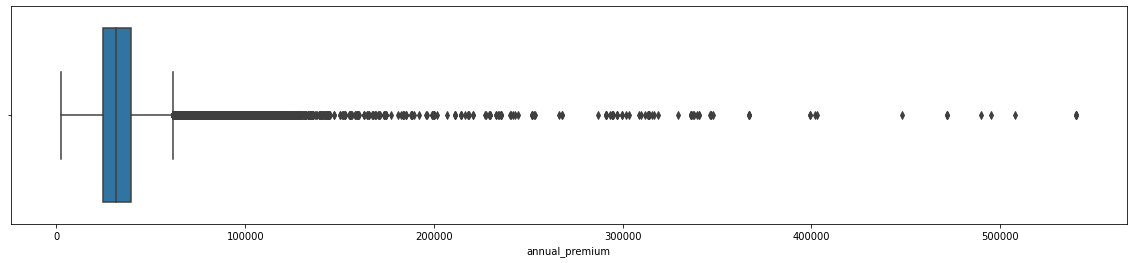

In [0]:
plt.subplots(figsize=(20,4))
sns.boxplot(x=df["annual_premium"])

In [0]:
mean = np.mean(df['annual_premium'])
std = np.std(df['annual_premium'])

In [0]:
df[df['annual_premium'] > mean + 2 * std]

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,vehicle_age_num,vehicle_damage_num,gender_num,annual_premmium
37,38,Female,25,1,28.0,1,< 1 Year,No,76251.0,152.0,107,0,0,0,1,76251.0
67,68,Male,60,1,28.0,0,1-2 Year,Yes,66338.0,124.0,73,0,1,1,0,66338.0
149,150,Female,22,1,11.0,1,< 1 Year,No,76651.0,152.0,258,0,0,0,1,76651.0
167,168,Female,26,1,8.0,0,< 1 Year,Yes,89282.0,152.0,101,0,0,1,1,89282.0
176,177,Male,25,1,28.0,1,< 1 Year,No,101021.0,152.0,49,0,0,0,0,101021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
380815,380816,Female,32,1,28.0,1,< 1 Year,No,91305.0,152.0,183,0,0,0,1,91305.0
380860,380861,Female,64,1,28.0,0,1-2 Year,Yes,71661.0,26.0,29,0,1,1,1,71661.0
380998,380999,Female,33,1,8.0,0,1-2 Year,Yes,101664.0,124.0,21,0,1,1,1,101664.0
381047,381048,Female,52,1,8.0,1,1-2 Year,No,71915.0,7.0,233,0,1,0,1,71915.0


In [0]:
df = df[df['annual_premium'] < mean + 2 * std]

Out[38]: <AxesSubplot:xlabel='annual_premium'>

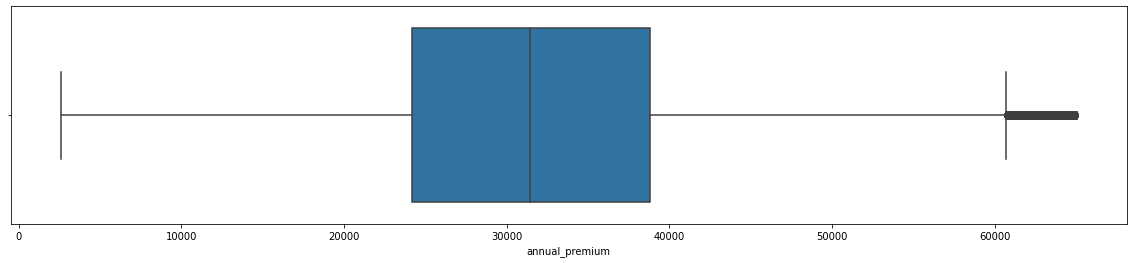

In [0]:
plt.subplots(figsize=(20,4))
sns.boxplot(x=df["annual_premium"])

In [0]:
df_parquet = spark.read.format("parquet")\
.load("/FileStore/tables/Processing/dados_tratados.parquet")